In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#https://qiita.com/holygo/items/e2774a5a891700c3916a

In [46]:
df = pd.read_csv('pca_data.csv')
y = df["Price"].values
df_x = df.drop(columns=["Date", "Price"])
df.head()

,Date,Price,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2019-01-01,3873.8,-5.276724,-3.996305,4.415994,0.782341,0.006974,-1.158301,-0.067363,-0.493529,-0.380081,-0.816549
1,2019-01-02,3780.1,-5.170930,-1.749534,3.272299,0.231817,0.084481,-0.432730,0.612391,-0.211036,0.306339,-1.013738
2,2019-01-03,3802.7,-5.209785,-1.169560,2.974107,-0.108983,-0.049247,0.039013,0.528102,-0.261826,0.308010,-1.297063
3,2019-01-04,3785.4,-5.461036,-1.735294,2.323524,-0.567059,0.263961,0.028043,0.654446,-0.352479,0.583729,-1.297370
4,2019-01-05,4004.1,-5.670215,-3.597870,2.514400,-0.610786,0.316173,-0.390688,-0.088829,-0.400014,0.398350,-1.270139


In [47]:
a_train, a_test = train_test_split(df, test_size=0.6)

In [48]:
class MaximumLikelihoodEstimation():
    def __init__(self):
        self.df = pd.read_csv('pca_data.csv')
        train, test = train_test_split(self.df, test_size=0.3)
        self.train_y = train["Price"].values
        self.test_y = test["Price"].values
        self.date = test["Date"]
        self.train_x = np.array(train.drop(columns=["Date", "Price"]))
        self.test_x = np.array(test.drop(columns=["Date", "Price"]))
        
    def calculate_optimal_w(self, x, y):
        #np.linalg.inv = get inverse matrix
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
        
    
    def predict_y(self, x):
        y_hat = np.dot(self.w.T, x.T).ravel()
        return y_hat
    
    def get_var(self, y, y_hat):
        np.sum(np.square(y-y_hat)) / len(y)
    
        
    def display_graph(self, y_hat):
        fig, ax = plt.subplots(1,2,figsize=(12,4))
        ax[0].scatter(self.date, self.test_y, label='train_data',color='b')
        ax[1].plot(self.date, y_hat,label='predict curve',color='r')
        plt.show()
                      
    def main(self):
        self.calculate_optimal_w(self.train_x, self.train_y)
        y_hat = self.predict_y(self.test_x)
        print(y_hat.shape)
        print(self.test_y.shape)
        var = self.get_var(self.test_y, y_hat)
        self.display_graph(y_hat)
        
               
        

(308,)
(308,)


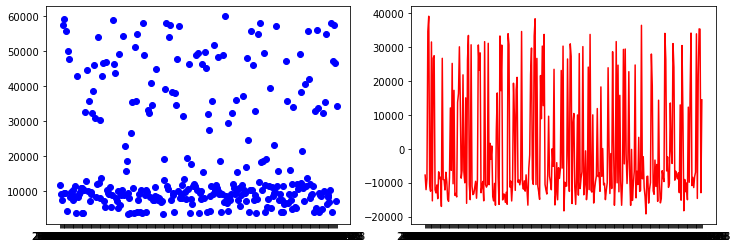

In [49]:
maximum_likelihood_estimation = MaximumLikelihoodEstimation()
maximum_likelihood_estimation.main()

In [37]:
maximum_likelihood_estimation.

array([ 3406.85808031, -1642.20816788, -1050.65041973, -1608.6816815 ,
       -1780.33777651,   432.5875876 ,   898.5974643 ,   251.94667266,
       -1357.21882855,   281.44736186])